In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np

In [2]:
random.seed(1852026)

In [3]:
df = pd.read_excel("dataPoints.xlsx")
data = df.to_numpy()#change to matrix

You have to randomly split the data set into a training set, a validation set and a test set. Suggested
percentages for this split are 70 %, 15% and 15%, respectively, **but feel free to experiment
and change these numbers.**

Define train, test and validation set

In [4]:
df.head()

,x1,x2,y
0,-1.262271,0.746859,0.461002
1,-0.804355,0.937081,0.617336
2,-1.805674,0.738389,-0.053984
3,-0.888805,0.061711,1.943678
4,-1.667562,-0.534543,2.127070


In [5]:
data_train, data_rest = train_test_split(data, test_size=0.30)

In [6]:
data_test, data_validate = train_test_split(data_rest, test_size=0.50)

Create input vectors

In [7]:
X_train = np.transpose(data_train[:,0:2])
Y_train = np.transpose(data_train[:,2:])
X_validate = np.transpose(data_validate[:,0:2])
Y_validate = np.transpose(data_validate[:,2:])
X_test = np.transpose(data_test[:,0:2])
Y_test = np.transpose(data_test[:,2:])


In [8]:
n = X_train.shape[0] # Size of the input vector X
n_y = Y_train.shape[0] # Size of the input vector Y
P = X_train.shape[1] # Size of the sample
N = 5 # size of the hidden layer, # neurons, this is just for the moment to have some example

# Question 1. (Full minimization)

### MLP network

In [9]:
W = np.random.randn(N,n)# * 0.01
bias = np.random.randn(N,1)# * 0.01
V = np.random.randn(n_y,N)# * 0.01

ro=10**-5 #10-5 unti, 10-3
sigma=1

In [10]:
print(V,'\n')
print(W,'\n')
print(bias)

[[-0.41649178 -0.55049122 -1.43295871  0.19286255  0.7918152 ]] 

[[ 0.62438711  0.47098498]
 [ 0.18705431 -1.70592485]
 [ 0.35770477  0.87323732]
 [-1.07336075 -0.46097535]
 [ 0.40345994  0.08322687]] 

[[ 0.66567952]
 [ 0.47503684]
 [-1.9914389 ]
 [-2.35187012]
 [ 1.22282192]]


In [11]:
a=pd.DataFrame(V.T)
a[2]=W[:,0]
a[3]=W[:,1]
a[4]=bias
omega=np.matrix(a)
omega

matrix([[-0.41649178,  0.62438711,  0.47098498,  0.66567952],
        [-0.55049122,  0.18705431, -1.70592485,  0.47503684],
        [-1.43295871,  0.35770477,  0.87323732, -1.9914389 ],
        [ 0.19286255, -1.07336075, -0.46097535, -2.35187012],
        [ 0.7918152 ,  0.40345994,  0.08322687,  1.22282192]])

In [12]:
X=X_train
true=Y_train

a=pd.DataFrame(V.T)
a[2]=W[:,0]
a[3]=W[:,1]
a[4]=bias
omega=np.matrix(a)


def second_norm(omega):
    return np.linalg.norm(omega)**2   #,2)#**2

def activation_f(t,sigma=1):
    return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)


def predict(omega,X):  

    
    V=omega.T[:N].reshape(1,N)
    W=omega.T[N:N+2*N].reshape(N,2)
    
    bias=omega.T[N+2*N:].reshape(N,1)
    
    t=W.dot(X)-bias

    
    predicted_values=V.dot(activation_f(t,sigma))
    return predicted_values#, W,bias




def reg_tr_error(omega,functionArgs):

    X=functionArgs[0]
    true=functionArgs[1]
    
    predicted=predict(omega,X)
  
    
    err=np.array(predicted)-true #err_all=np.sum(np.array(predicted)-true)**2
    err_all=err.dot(err.T)

    
    P=X.shape[1]
    return ((err_all)/(2*P)+ro*second_norm(omega)).item(0)

In [13]:
reg_tr_error(omega.flatten(),[X_train,Y_train])

2.264265589171158

In [14]:
res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train])
res

      fun: 0.04876396551130595
 hess_inv: array([[ 1.22122903e+03,  1.99061249e+01,  9.12235843e+02,
         9.52511242e+02, -9.49305047e+02, -1.08382481e+00,
         2.93661874e+02,  2.33780915e+01,  7.72907627e+00,
        -1.89758905e+01,  7.69793644e+01,  6.62956917e+01,
         3.14354844e+00, -3.79724061e+01, -4.19521154e+01,
         1.02087940e+02, -1.12293415e+01, -9.77283332e+00,
         1.57762451e+01, -7.17821742e+01],
       [ 1.99061249e+01,  1.95998592e+02, -2.35964951e+02,
        -1.21299014e+01,  1.98413446e+02,  9.23761363e-01,
         9.03206511e-02, -1.84364764e+02, -7.03396770e+00,
        -3.68762159e+00,  1.36199097e+01,  1.79499229e+01,
         8.28609360e-01, -1.32523559e+01,  1.23751093e+00,
        -3.67974829e-01, -1.02999498e+02,  7.44852399e-01,
         4.38278643e+01,  9.12805245e+00],
       [ 9.12235843e+02, -2.35964951e+02,  5.20775241e+03,
         3.01881250e+02, -5.72437964e+03,  2.09489653e+01,
         3.28965877e+02,  2.45967107e+02,  1.6

In [15]:
print(reg_tr_error(res['x'].flatten(),[X_train,Y_train]))
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test]))

0.04876396551130595
0.050855862048154954
0.04796682847027177


In [16]:
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test]))


0.050855862048154954
0.04796682847027177


$$ E(\omega,\pi) = \frac{1}{2P}\sum_{p=1}^{P}(f(x^p)-y^p)^2+\rho \| \omega\|^2$$

Hyperparameters:
        
    the number of neurons N of the hidden layer
    the spread delta in the activation function g(t)
    the regularization parameter rho

## DRAFT VERSION OF THE ""HOMEMADE"" CROSS-VALIDATION METHOD

In [17]:
# the .fit method part is sort of missing cause choosing different configuratuons is needed

In [18]:
def mse(true,predicted):
    return (np.sum(np.array(true-predicted)**2))/true.shape[0]

K=5   # SO 4 folds for training 1-validation for testing; they switch every time
cv_data=np.concatenate((data_train,data_validate))
np.random.shuffle(cv_data)
indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
folds=[]



X=X_train
W
V
bias
true=Y_train

ro=10**-5 #10-5 unti, 10-3
sigma=1
P=cv_data.shape[0]



val_err_dict={}
train_err_dict={}

data=cv_data.copy()
#CHOSEN OMEGA?

omega=res['x']
for i in range(len(indices)):
    cv_data=data
    if i<4:
        l=[i for i in range(indices[i],indices[i+1])]
        #(VALIDATION fold) for testing
        validate_cv=cv_data[indices[i]:indices[i+1],:]
        
        #train folds together for training
        df=pd.DataFrame(cv_data)
        train_cv=df.drop(df.index[l])
        
        
        
        X_train = np.transpose(np.matrix(train_cv)[:,0:2])
        Y_train = np.transpose(np.matrix(train_cv)[:,2:])
        X_validate = np.transpose(validate_cv[:,0:2])
        Y_validate = np.transpose(validate_cv[:,2:])

        train_err_dict[i]=mse(Y_train,predict(omega.flatten(),X_train))
        val_err_dict[i]=mse(Y_validate,predict(omega.flatten(),X_validate))
        
    #    reg_tr_error(omega.flatten(),X_test)
    else:
        #for the last element
        l=list([i for i in range(indices[i],255)])
        #(VALIDATION fold) for testing
        validate_cv=cv_data[indices[i]:,:]
        
        #train folds together for training
        df=pd.DataFrame(cv_data)
        train_cv=df.drop(df.index[l])
        
        val_err_dict[i]=mse(Y_validate,predict(omega,X_validate))
        train_err_dict[i]=mse(Y_train,predict(omega.flatten(),X_train))


In [19]:
#average rmse
sum(val_err_dict.values())/len(val_err_dict)

4.905545763576734

In [20]:
#average rmse
sum(train_err_dict.values())/len(train_err_dict)

18.147766491483342

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def saddle(X):
    omega=res['x']
    

    
    V=omega.T[:N].reshape(1,N)
    W=omega.T[N:N+2*N].reshape(N,2)
    
    bias=omega.T[N+2*N:].reshape(N,1)
    
    def tanh(t,sigma=1):
        return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)
    def activation_f(W,X,bias):
        
        return tanh(W.dot(X)-bias,sigma)
  
    predicted_values=V.dot(activation_f(W,X,bias))
    return predicted_values


def plotting( title='Plotting of the function'): #if you do not provide a title, 'Plotting...' will be used

    fig = plt.figure(figsize=(40,20))
    ax = plt.axes(projection='3d')

    sample=50 
 
    X = X_train[0]
    Y = X_train[1]
    sample = X.shape[0]
 
    sample=10
    x = np.linspace(-1, 1, sample) #create 50 points between [-5,5] evenly spaced  

    y = np.linspace(-2, 2, sample)

    X, Y = np.meshgrid(x,y) #create the grid for the plot
    XY=np.concatenate((x,y)).reshape(2,sample).T
    
     
    Z = saddle(XY.T) #evaluate the function (note that X,Y,Z are matrix)
    Z=predict(omega,XY.T)

    xy = np.mgrid[-2:2.002:0.05, -1:1.002:0.05].reshape(2,-1).T
    X = xy[:, 0].squeeze()
    Y = xy[:, 1].squeeze()
    
    XY=np.concatenate((X,Y)).reshape(2,X.shape[0]).T

    
    Z = saddle(XY.T)
    Z=Z.T.reshape(X.shape[0],)

    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(X, Y, Z, linewidth=0.010, antialiased=True,cmap='viridis')
#    fig.savefig('results_11_MLP')
    plt.grid()
    
    return X.shape,Y.shape,Z.shape,X,Y,Z.T
 

((3321,),
 (3321,),
 (3321,),
 array([-2., -2., -2., ...,  2.,  2.,  2.]),
 array([-1.  , -0.95, -0.9 , ...,  0.9 ,  0.95,  1.  ]),
 array([3.80181617, 3.72521461, 3.64955626, ..., 3.83889937, 4.08150499,
        4.32685122]))

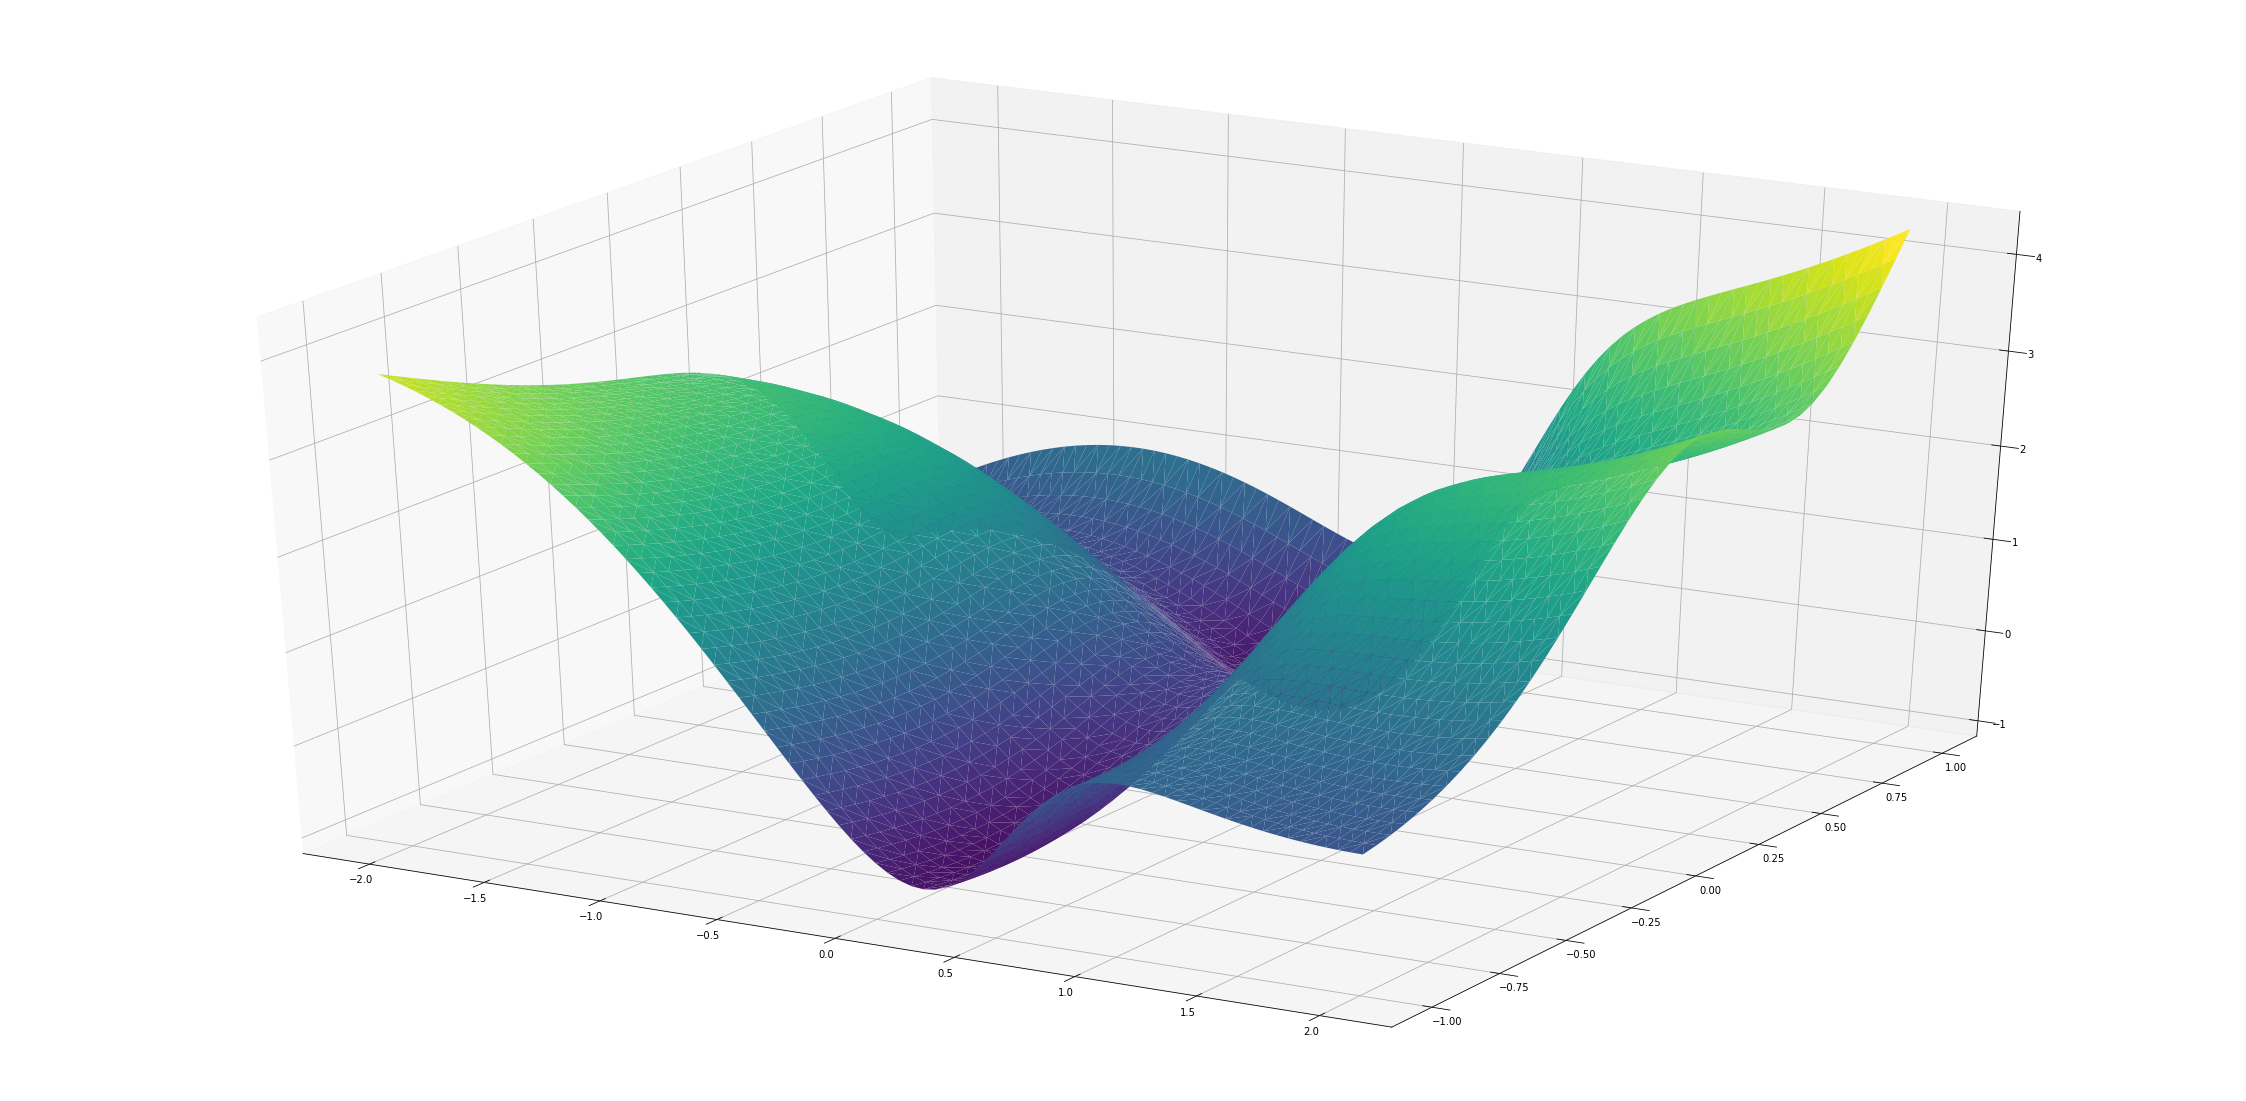

In [22]:
plotting()

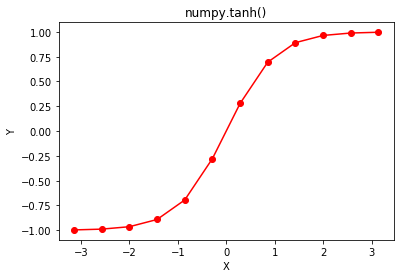

In [23]:
in_array = np.linspace(-np.pi, np.pi, 12) 
out_array = np.tanh(in_array) 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 